<a href="https://colab.research.google.com/github/madinaoraz/BECImageSegmentation/blob/main/Vortex_Identification_by_Blob_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Madina Oraz' 25 - Vortex Identification by Blob Size
Advisors: Professor David S. Hall, Sophie Koh' 22

SURF 2022, Amherst College Physics and Astronomy Department

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from skimage.io import imshow, imread
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.morphology import erosion, dilation, opening, closing

In [ ]:
#defining functions
def im_dil (im,num): #image dilation
  for i in range (num):
    im = dilation(im)
    return im

def im_ero (im,num): #image erosion
  for i in range (num):
    im = erosion(im)
    return(im)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


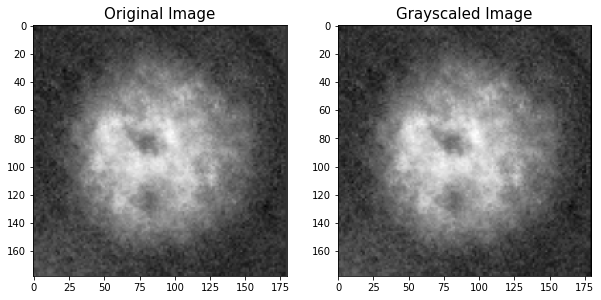

In [ ]:
#grayscaling the image - dismiss if input is already black and white
input = imread("/content/drive/Shareddrives/SURF 2022 Hall Lab/Madina/input.png") #file upload here
input_bw = rgb2gray(input)

fig,ax = plt.subplots(1,2, figsize = (10,5))

ax[0].imshow(input)
ax[0].set_title('Original Image', fontsize = 15)

ax[1].imshow(input_bw, cmap='gray')
ax[1].set_title('Grayscaled Image', fontsize = 15)

plt.show()

Text(0.5, 1.0, 'Binarized and Inverted Image')

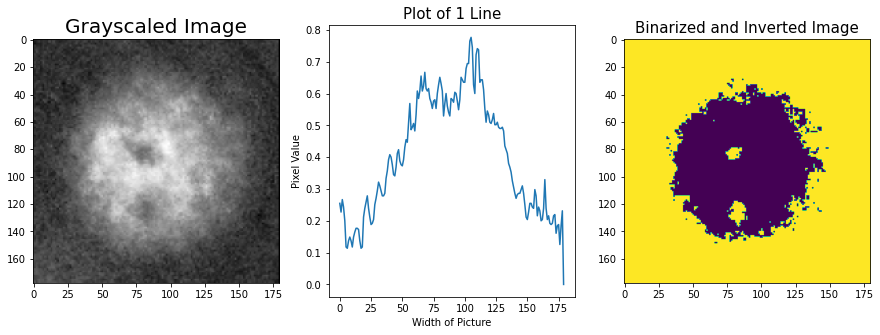

In [ ]:
#binarizing the image - dismiss if input is already binarized
fig, ax = plt.subplots(1,3,figsize=(15,5))

input_bn = input_bw > 0.5 #change the value to that where pixel value separates
input_b = np.invert(input_bn) #inverting the binarized image as blobs on just binarized images are usually light which we do not want

ax[0].imshow(input_bw,cmap='gray')
ax[0].set_title('Grayscaled Image',fontsize=20)

ax[1].plot(input_bw[50]) #if this line gets mad put a number slightly lower than the range given
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)

ax[2].imshow(input_b)
ax[2].set_title('Binarized and Inverted Image',fontsize=15)

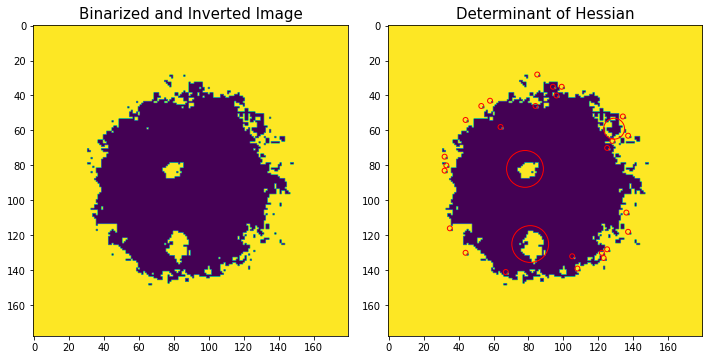

In [ ]:
#determinant of hessian
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(input_b)
ax[0].set_title('Binarized and Inverted Image',fontsize=15)

input_c = blob_doh(input_b, max_sigma=30, threshold=0.04)

ax[1].imshow(input_b)
for blob in input_c:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[1].set_title('Determinant of Hessian',fontsize=15)

plt.tight_layout()
plt.show()

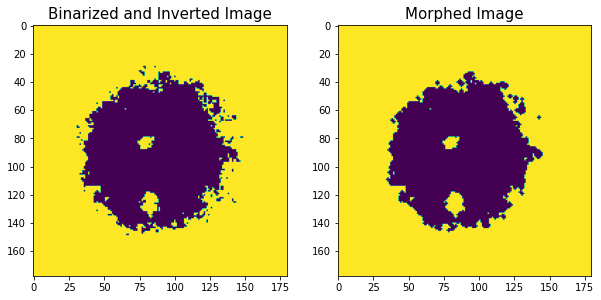

In [ ]:
#image morphing
input_m = im_ero(im_dil(input_b,5),5)

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(input_b)
ax[0].set_title('Binarized and Inverted Image',fontsize=15)

ax[1].imshow(input_m)
ax[1].set_title('Morphed Image',fontsize=15)

plt.show()

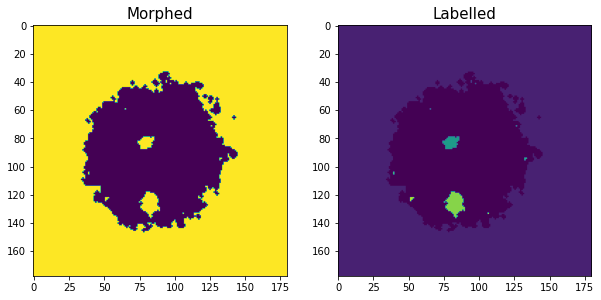

In [ ]:
#labelling
input_l = label(input_m)

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(input_m)
ax[0].set_title('Morphed',fontsize=15)

ax[1].imshow(input_l)
ax[1].set_title('Labelled',fontsize=15)

plt.show()

In [ ]:
#number of detected blobs - always more than anticipated
input_db = regionprops(input_l)
print(len(input_db))

11


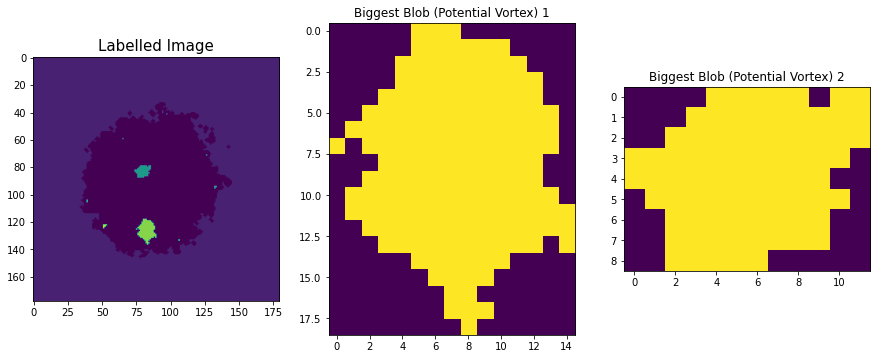

In [ ]:
#detecting potential vortices a.k.a second and third biggest blob - first biggest blob is usually the condensate
list_1 = []
for x in input_db:
    list_1.append(x.area)
list_2  = sorted(list(enumerate(list_1)),key=lambda x: x[1], reverse=True)[:7]

fig, ax = plt.subplots(1,3,figsize=(15,10))

ax[0].imshow(input_l)
ax[0].set_title('Labelled Image',fontsize=15)

for x,y in enumerate(list_2[1:3]): #change number of blobs here
    ax[x+1].imshow(input_db[y[0]].image)
    ax[x+1].set_title('Biggest Blob (Potential Vortex) '+ str(x+1))

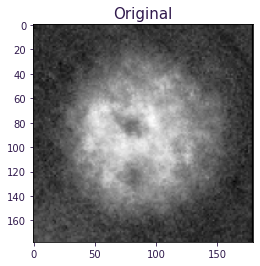

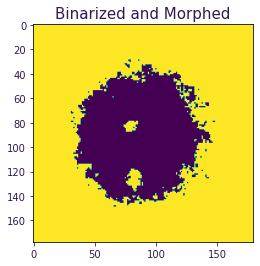

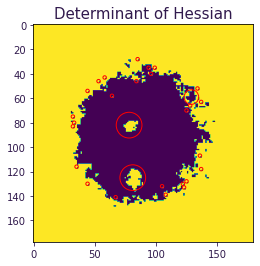

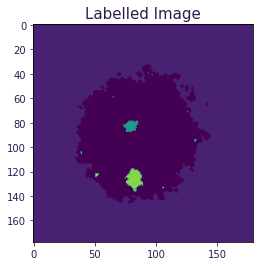

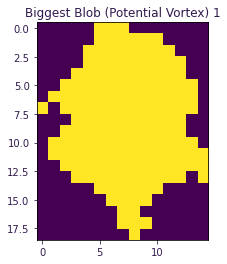

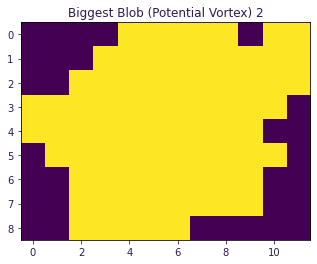

In [ ]:
#for poster
fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
ax.imshow(input_bw, cmap='gray')
ax.set_title('Original', fontsize = 15, color = '#311a4d')
plt.show()

fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
ax.imshow(input_b)
ax.set_title('Binarized and Morphed',fontsize=15,color = '#311a4d')
plt.show()

fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
ax.imshow(input_b)
for blob in input_c:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax.set_title('Determinant of Hessian',fontsize=15, color = '#311a4d')
plt.show()

fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
ax.imshow(input_l)
ax.set_title('Labelled Image',fontsize=15, color = '#311a4d')
plt.show()



list_1 = []
for x in input_db:
    list_1.append(x.area)
list_2  = sorted(list(enumerate(list_1)),key=lambda x: x[1], reverse=True)[:7]

fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
for x,y in enumerate(list_2[1:3]): #change number of blobs here
    ax.imshow(input_db[y[0]].image)
    ax.set_title('Biggest Blob (Potential Vortex) '+ str(x+1), color='#311a4d')
    plt.show()

fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
for x,y in enumerate(list_2[1:3]): #change number of blobs here
    ax.imshow(input_db[y[0]].image)
    ax.set_title('Biggest Blob (Potential Vortex) '+ str(x+1), color='#311a4d')
plt.show()

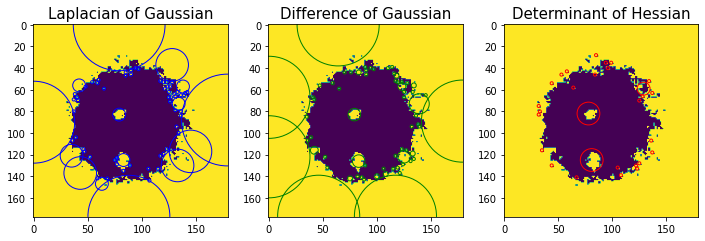

In [ ]:
#for poster

fig, ax = plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(input_b)
input_log = blob_log(input_b, max_sigma=30, threshold=0.04)
for blob in input_log:
    y, x, area = blob
    ax[0].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='b', 
                            fill=False))
ax[0].set_title('Laplacian of Gaussian',fontsize=15)

ax[1].imshow(input_b)
input_dog = blob_dog(input_b, max_sigma=30, threshold=0.04)
for blob in input_dog:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='g', 
                            fill=False))
ax[1].set_title('Difference of Gaussian',fontsize=15)

ax[2].imshow(input_b)
input_doh = blob_doh(input_b, max_sigma=30, threshold=0.04)
for blob in input_doh:
    y, x, area = blob
    ax[2].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[2].set_title('Determinant of Hessian',fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
#example
example = imread("/content/drive/Shareddrives/SURF 2022 Hall Lab/Madina/example.png") #file upload here
example_bw = rgb2gray(example)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Binarized and Inverted Image')

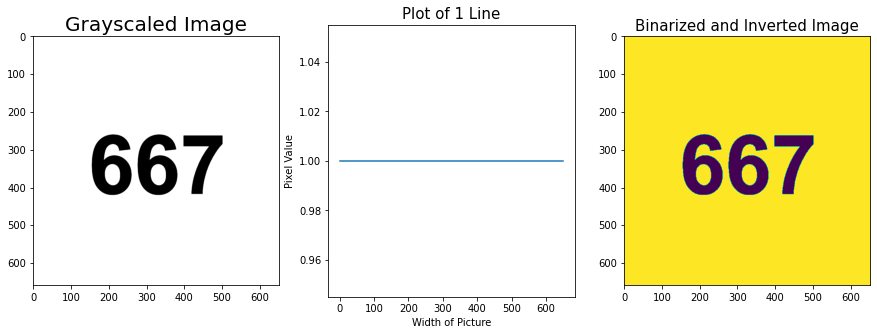

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

example_bn = example_bw > 0.6 #change the value to that where pixel value separates
#cookie_b = np.invert(cookie_bn) #inverting the binarized image as blobs on just binarized images are usually light which we do not want

ax[0].imshow(example_bw,cmap='gray')
ax[0].set_title('Grayscaled Image',fontsize=20)

ax[1].plot(example_bw[150]) #if this line gets mad put a number slightly lower than the range given
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)

ax[2].imshow(example_bn)
ax[2].set_title('Binarized and Inverted Image',fontsize=15)

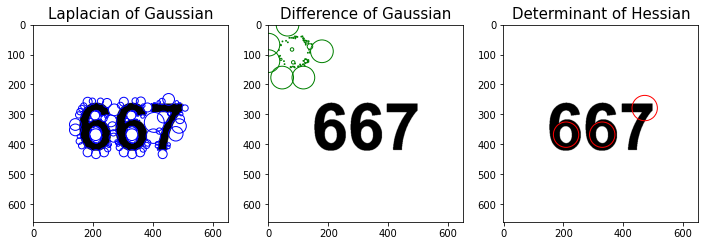

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(example_bn, cmap = 'gray')
example_log = blob_log(example_bn, max_sigma=30, threshold=0.045)
for blob in example_log:
    y, x, area = blob
    ax[0].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='b', 
                            fill=False))
ax[0].set_title('Laplacian of Gaussian',fontsize=15)

ax[1].imshow(example_bn, cmap = 'gray')
example_dog = blob_dog(input_b, max_sigma=30, threshold=0.045)
for blob in example_dog:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='g', 
                            fill=False))
ax[1].set_title('Difference of Gaussian',fontsize=15)

ax[2].imshow(example_bn, cmap = 'gray')
cookie_doh = blob_doh(example_bn, max_sigma=30, threshold=0.045)
for blob in cookie_doh:
    y, x, area = blob
    ax[2].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[2].set_title('Determinant of Hessian',fontsize=15)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Plot of 1 Line')

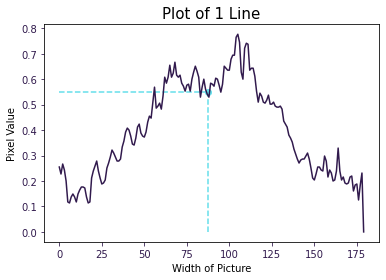

In [ ]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', colors='#311a4d') 
ax.tick_params(axis='y', colors='#311a4d')
ax.plot(input_bw[50], color='#311a4d') #if this line gets mad put a number slightly lower than the range given

plt.scatter(87.5,0.55, color = '#64dfeb')
plt.vlines(87.5, 0, 0.55, linestyle="dashed", color = '#64dfeb')
plt.hlines(0.55, 0, 87.5, linestyle="dashed",  color = '#64dfeb')

ax.set_ylabel('Pixel Value')
ax.set_xlabel('Width of Picture')
ax.set_title('Plot of 1 Line',fontsize=15)
